## Playground for testing feature selection and mining tools/analysis

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('Clean_NFL_Dataset.csv')

/var/folders/gs/bkhxc_8j6j75zg2082gpc_9c0000gn/T/ipykernel_51915/3549922856.py:6: DtypeWarning: Columns (63,64,65,66,72,73,74,79,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Clean_NFL_Dataset.csv')


In [3]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
print(df.corr())

                           Unnamed: 0   play_id   game_id  yardline_100  \
Unnamed: 0                   1.000000  0.010664  0.995450      0.001679   
play_id                      0.010664  1.000000  0.010997     -0.072749   
game_id                      0.995450  0.010997  1.000000      0.001684   
yardline_100                 0.001679 -0.072749  0.001684      1.000000   
quarter_seconds_remaining   -0.009989 -0.274945 -0.010137      0.146281   
drive                       -0.022846  0.962120 -0.023176     -0.034952   
sp                           0.000705  0.001767  0.000739     -0.354454   
qtr                          0.001068  0.954771  0.000875     -0.047432   
down                        -0.010124 -0.033661 -0.010570      0.185339   
goal_to_go                   0.000750  0.012262  0.000728     -0.373260   
ydstogo                      0.000642 -0.031469  0.000869      0.379180   
ydsnet                       0.104160  0.011657  0.105511     -0.549859   
play_type                

/var/folders/gs/bkhxc_8j6j75zg2082gpc_9c0000gn/T/ipykernel_51915/3605039513.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


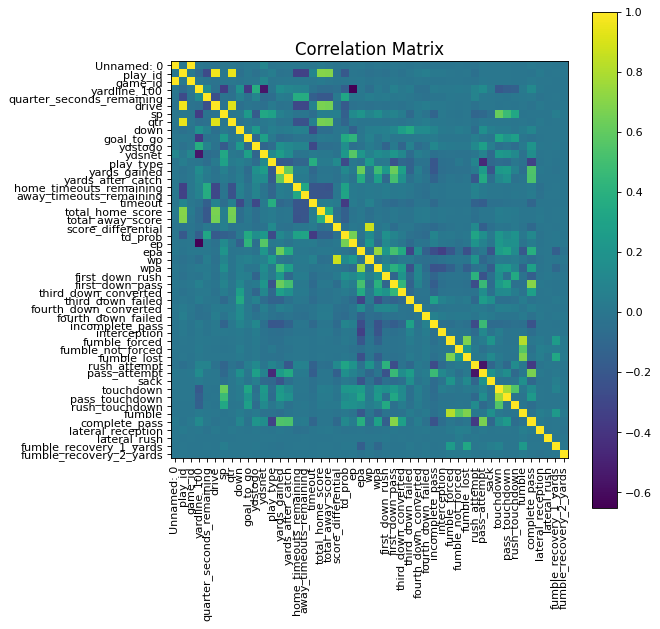

In [6]:
plotCorrelationMatrix(df, 8)

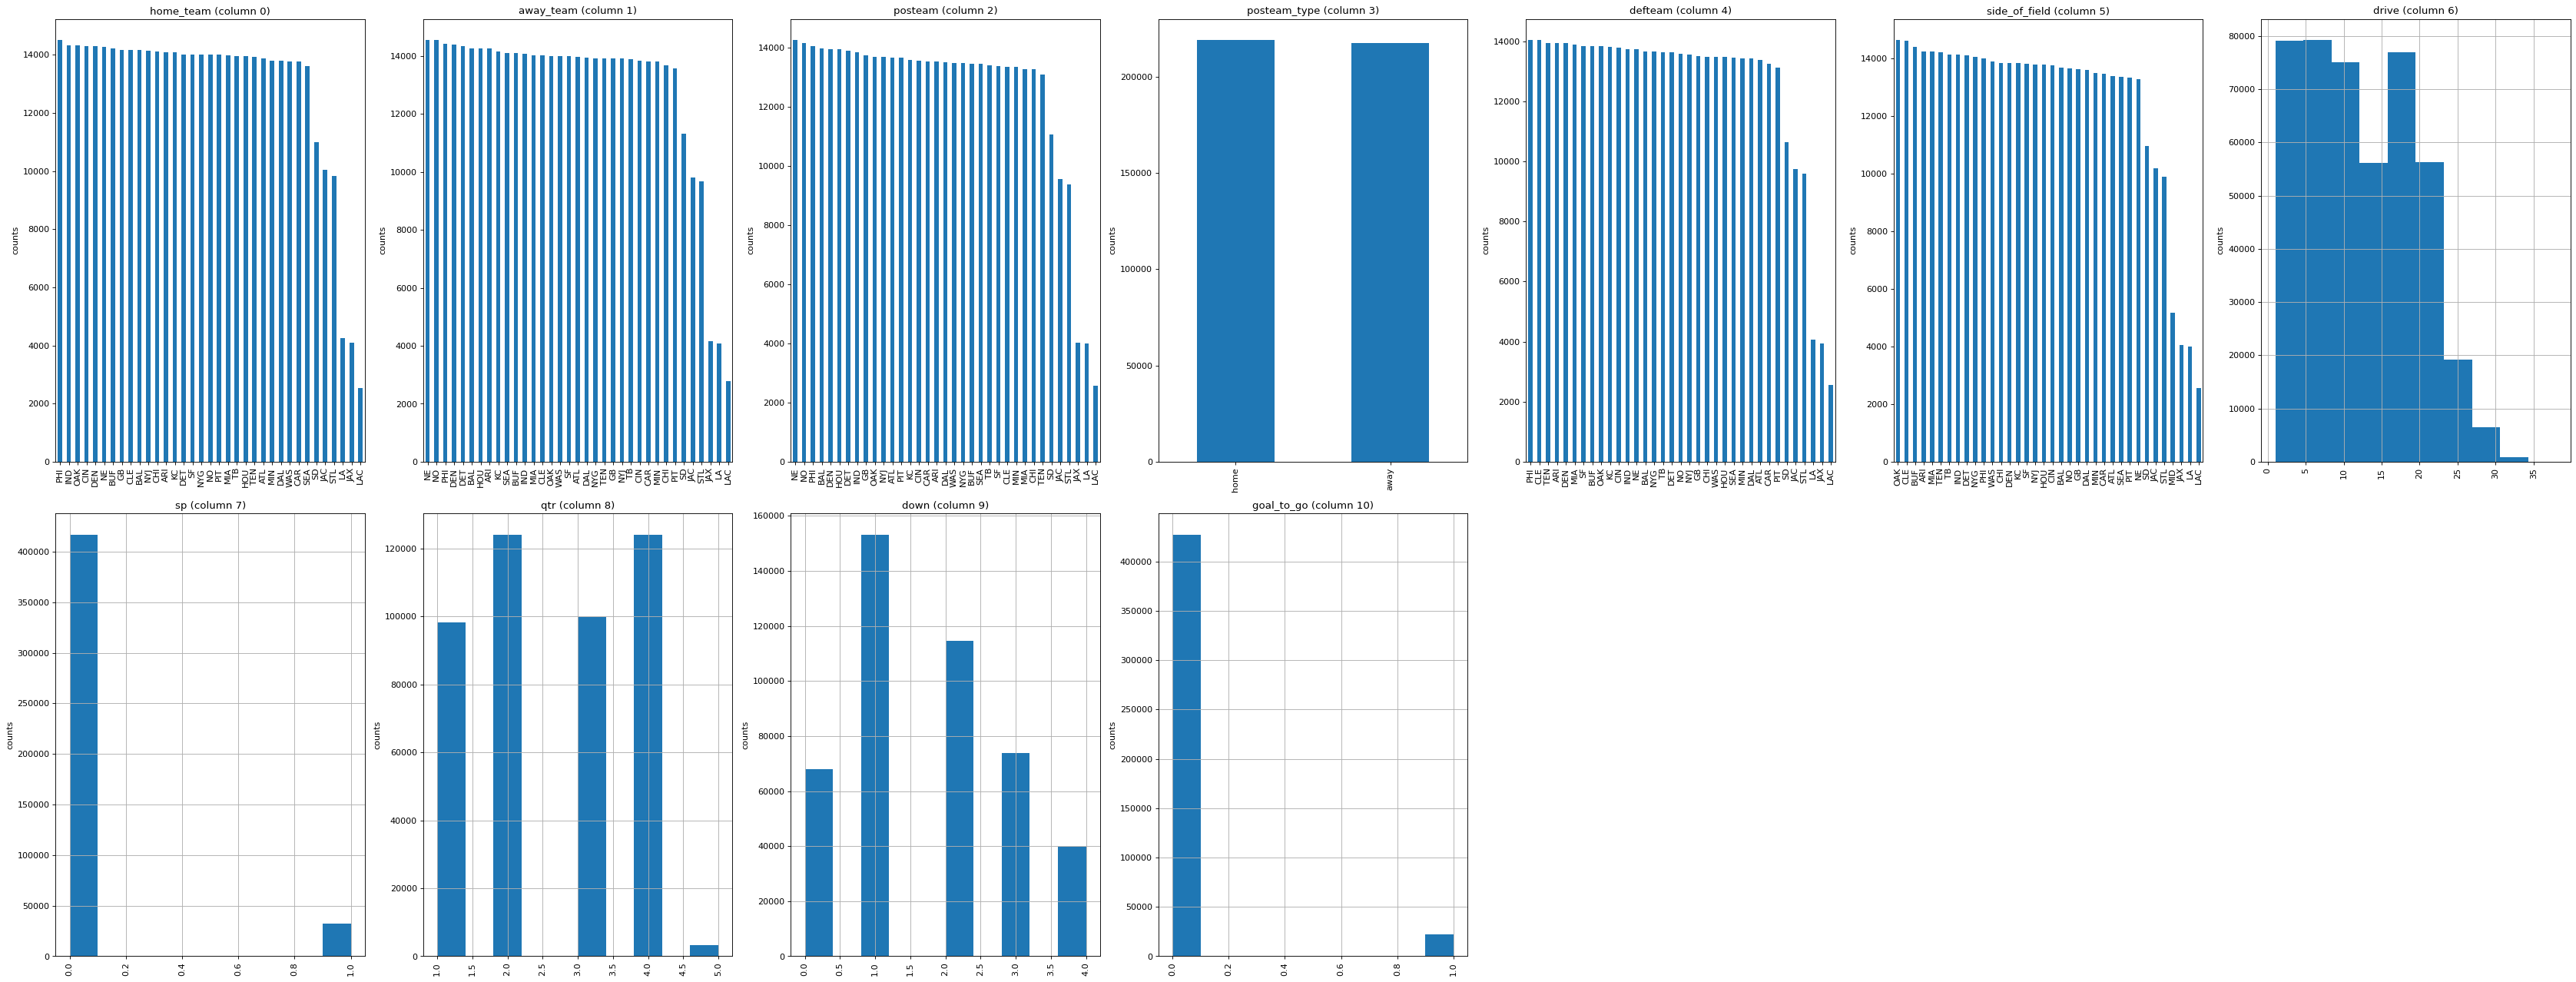

In [7]:
# To see more plots, change the last 2 arguments (nGraphShown, nGraphPerRow) to view more attributes, and to increase the graphs per row (whole number necessary)
plotPerColumnDistribution(df, 11, 7)

In [12]:
corrMatrix = df.corr()
corrMatrix.to_csv('Correlation.csv', encoding='utf-8')
print(corrMatrix)

                           Unnamed: 0   play_id   game_id  yardline_100  \
Unnamed: 0                   1.000000  0.010664  0.995450      0.001679   
play_id                      0.010664  1.000000  0.010997     -0.072749   
game_id                      0.995450  0.010997  1.000000      0.001684   
yardline_100                 0.001679 -0.072749  0.001684      1.000000   
quarter_seconds_remaining   -0.009989 -0.274945 -0.010137      0.146281   
drive                       -0.022846  0.962120 -0.023176     -0.034952   
sp                           0.000705  0.001767  0.000739     -0.354454   
qtr                          0.001068  0.954771  0.000875     -0.047432   
down                        -0.010124 -0.033661 -0.010570      0.185339   
goal_to_go                   0.000750  0.012262  0.000728     -0.373260   
ydstogo                      0.000642 -0.031469  0.000869      0.379180   
ydsnet                       0.104160  0.011657  0.105511     -0.549859   
play_type                